# 🚦 Accident Analysis & Prevention using Python + GenAI

## Mini Project (POC)

### Objective
Analyze accident data to identify key contributing factors and provide
actionable prevention recommendations using data-driven insights.

### Tools Used
- Python (Pandas, NumPy)
- Matplotlib, Seaborn
- GenAI (for code & insight generation)


In [43]:
# Import required libraries
import pandas as pd                    # Data manipulation
import numpy as np                     # Numerical operations
import matplotlib.pyplot as plt        # Visualization
import seaborn as sns                  # Statistical visualization

In [64]:
# =============================================================================
# PHASE 1: DATA LOADING & INITIAL EXPLORATION
# =============================================================================

# Load accident dataset from CSV file
df = pd.read_csv(r"R:\learning\Python_learning\py_course\I_L\IL_Python_GenAI_Mini_project\RTA Dataset -  LMS.csv")

# Display basic information
# Display initial shape of the dataset, Display first 5 rows to understand structure, info and describe
print("\nDataset Shape:\n", df.shape, "\nDataset 1st five row:\n", df.head(), "\nDataset info:\n", df.info, "\nDataset describe:\n", df.describe())


Dataset Shape:
 (12316, 32) 
Dataset 1st five row:
        Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Veh

In [66]:
# =============================================================================
# PHASE 2: DATA CLEANING & PREPROCESSING
# =============================================================================

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Replace blanks ("") and "na" with NaN across the whole DataFrame
df = df.replace(["", " ", "na", "NA", "NaN"], np.nan)

# ----------------------------
# Convert Time column to datetime
# ----------------------------
# Correct time parsing for HH:MM:SS format
df["Time"] = pd.to_datetime(
    df["Time"],             # Original Time column
    format="%H:%M:%S",      # Time format
    errors="coerce"         # Invalid times become NaT
)

# Validate Time parsing
print("Invalid Time rows:", df["Time"].isna().sum())

# Drop invalid Time rows
#df = df.dropna(subset=["Time"])

# Keep only columns required
REQUIRED_COLUMNS = [
    "Time",
    "Day_of_week",
    "Weather_conditions",
    "Type_of_vehicle",
    "Area_accident_occured",
    "Accident_severity",
    "Number_of_casualties",
    "Number_of_vehicles_involved"
]

# Check missing values after column filtering
print("\nMissing Values Per Column:\n", df.isnull().sum())
df

Invalid Time rows: 0

Missing Values Per Column:
 Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_sever

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1900-01-01 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,1900-01-01 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,1900-01-01 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1900-01-01 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1900-01-01 16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,1900-01-01 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,1900-01-01 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,1900-01-01 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,NaN,NaN,NaN,NaN,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [67]:
# ----------------------------
# Handle missing categorical values
# ----------------------------
# Select all object (categorical) columns
# Fill categorical missing values safely
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val.iloc[0])
    else:
        df[col] = df[col].fillna("Unknown")

print(df.head())


                 Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 1900-01-01 17:02:00      Monday              18-30          Male   
1 1900-01-01 17:02:00      Monday              31-50          Male   
2 1900-01-01 17:02:00      Monday              18-30          Male   
3 1900-01-01 01:06:00      Sunday              18-30          Male   
4 1900-01-01 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0           Automobile            Owner              Above 10yr  ...   
1  Public (> 45 seats)    

In [75]:
# ----------------------------
# Feature Engineering
# ----------------------------

# Extract hour of day
df["hour_of_day"] = df["Time"].dt.hour

# Create time period feature
def time_period(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 22:
        return "Evening"
    else:
        return "Night"

# Apply time period function
df["time_period"] = df["hour_of_day"].apply(time_period)

# Remove duplicates
df.drop_duplicates(inplace=True)

print("\nCleaned Dataset Shape:", df.shape, "\n", df.head())
print(df.columns)



Cleaned Dataset Shape: (12316, 34) 
                  Time Day_of_week Age_band_of_driver Sex_of_driver  \
0 1900-01-01 17:02:00      Monday              18-30          Male   
1 1900-01-01 17:02:00      Monday              31-50          Male   
2 1900-01-01 17:02:00      Monday              18-30          Male   
3 1900-01-01 01:06:00      Sunday              18-30          Male   
4 1900-01-01 01:06:00      Sunday              18-30          Male   

    Educational_level Vehicle_driver_relation Driving_experience  \
0   Above high school                Employee              1-2yr   
1  Junior high school                Employee         Above 10yr   
2  Junior high school                Employee              1-2yr   
3  Junior high school                Employee             5-10yr   
4  Junior high school                Employee              2-5yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0           Automobile            Owner              Above 1

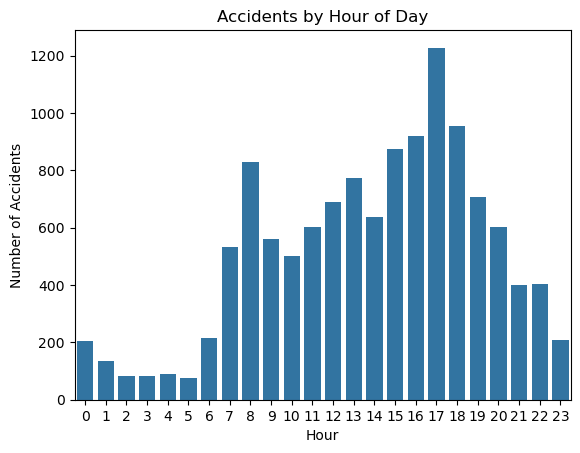

In [76]:
# =============================================================================
# PHASE 3: EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

# ----------------------------
# Visualization 1: Accidents by Hour
# ----------------------------

hour_counts = df["hour_of_day"].value_counts().sort_index()

sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


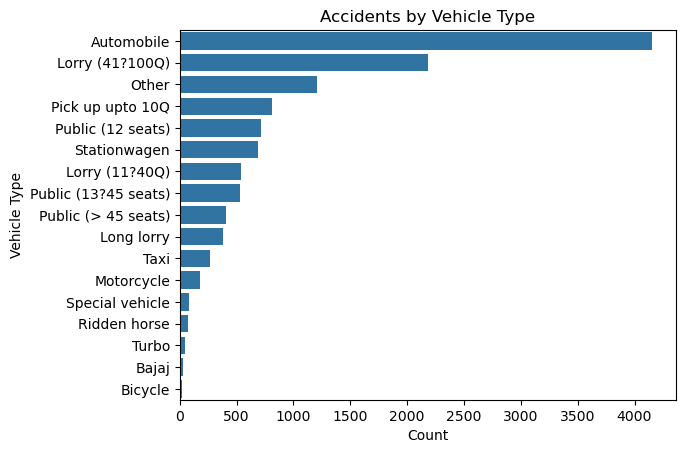

In [77]:
# ----------------------------
# Visualization 2: Vehicle Type Distribution
# ----------------------------
sns.countplot(
    data=df,
    y="Type_of_vehicle",
    order=df["Type_of_vehicle"].value_counts().index
)
plt.title("Accidents by Vehicle Type")
plt.xlabel("Count")
plt.ylabel("Vehicle Type")
plt.show()


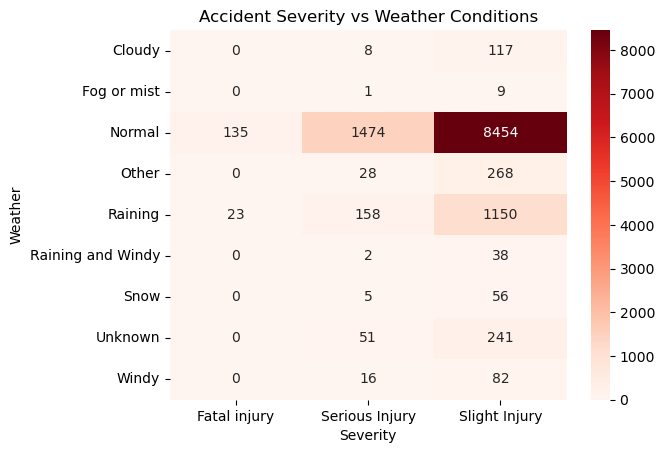

In [79]:
# ----------------------------
# Visualization 3: Weather vs Severity
# ----------------------------
weather_severity = (
    df.groupby(["Weather_conditions", "Accident_severity"])
    .size()
    .unstack(fill_value=0)
)

sns.heatmap(weather_severity, annot=True, fmt="d", cmap="Reds")
plt.title("Accident Severity vs Weather Conditions")
plt.xlabel("Severity")
plt.ylabel("Weather")
plt.show()


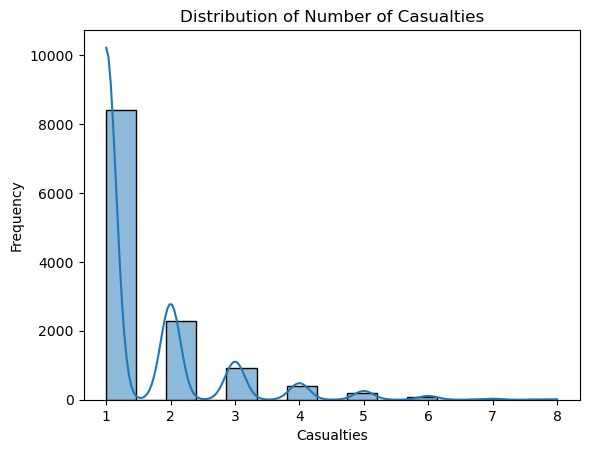

In [51]:
# ----------------------------
# Visualization 4: Casualty Distribution
# ----------------------------
sns.histplot(df["Number_of_casualties"], bins=15, kde=True)
plt.title("Distribution of Number of Casualties")
plt.xlabel("Casualties")
plt.ylabel("Frequency")
plt.show()


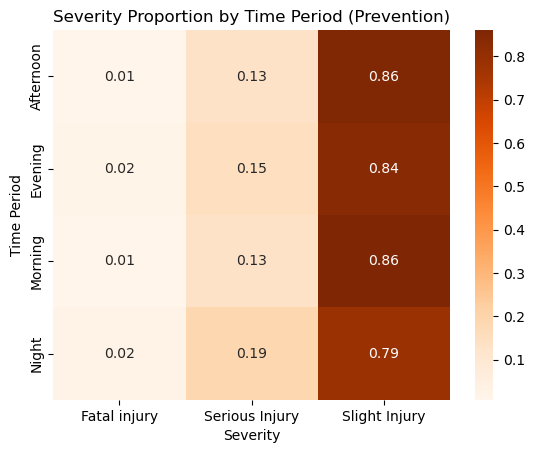

In [80]:
# =============================================================================
# PHASE 4: PREVENTION ANALYSIS & VISUALIZATIONS (KEY ADDITION)
# =============================================================================

# ----------------------------
# Prevention Visualization 1:
# Severity proportion by time period
# ----------------------------
time_severity = (
    df.groupby(["time_period", "Accident_severity"])
    .size()
    .unstack(fill_value=0)
)
# Convert counts to proportions
time_severity_pct = time_severity.div(time_severity.sum(axis=1), axis=0)

sns.heatmap(time_severity_pct, annot=True, fmt=".2f", cmap="Oranges")
plt.title("Severity Proportion by Time Period (Prevention)")
plt.xlabel("Severity")
plt.ylabel("Time Period")
plt.show()


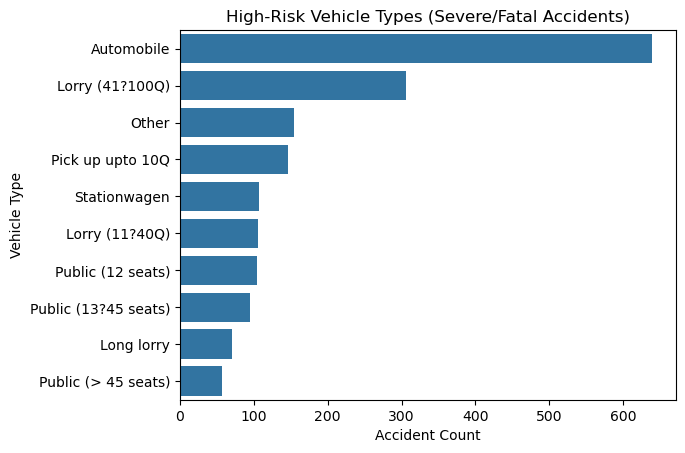

In [81]:
# ----------------------------
# Prevention Visualization 2:
# High-risk vehicle types (Serious + Fatal)
# ----------------------------
severe_cases = df[df["Accident_severity"].isin(["Serious Injury", "Fatal injury"])]

vehicle_risk = severe_cases["Type_of_vehicle"].value_counts().head(10)

sns.barplot(x=vehicle_risk.values, y=vehicle_risk.index)
plt.title("High-Risk Vehicle Types (Severe/Fatal Accidents)")
plt.xlabel("Accident Count")
plt.ylabel("Vehicle Type")
plt.show()


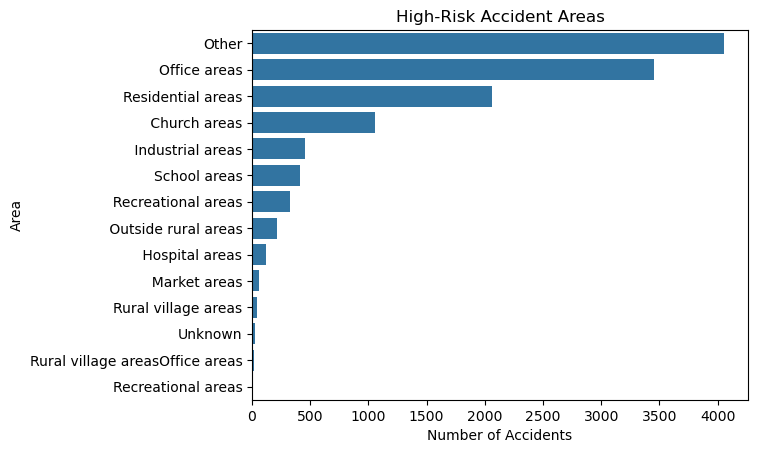

In [82]:
# ----------------------------
# Prevention Visualization 3:
# High-risk accident areas
# ----------------------------
area_counts = df["Area_accident_occured"].value_counts()

sns.barplot(x=area_counts.values, y=area_counts.index)
plt.title("High-Risk Accident Areas")
plt.xlabel("Number of Accidents")
plt.ylabel("Area")
plt.show()


# =============================================================================
# PHASE 5: GENAI-STYLE INSIGHT & PREVENTION RECOMMENDATIONS
# =============================================================================
## 🧠 GenAI-Assisted Insights

"""1. Accidents peak during **evening hours**, increasing post-work traffic risk.
2. **Rainy and foggy weather** shows a higher proportion of severe accidents.
3. **Motorcycles** are involved in a higher share of fatal and serious injuries.
4. **Market and residential areas** are accident hotspots."""

## 🚨 Prevention Recommendations

"""- Increase traffic enforcement during evening peak hours.
- Improve road drainage, lighting, and warning systems in adverse weather.
- Conduct targeted safety campaigns for motorcycle riders.
- Enhance pedestrian safety infrastructure in high-risk areas."""

## ✅ Project Summary

"""- Cleaned and processed real accident data
- Engineered meaningful time-based features
- Created EDA and prevention-focused visualizations
- Converted insights into actionable safety recommendations
- Used GenAI for coding and insight refinement"""
